In [1]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

dataset = fetch_california_housing()

#Converting to dataframe
df1 = pd.DataFrame(data=dataset.data,columns=dataset.feature_names)
df2 = pd.DataFrame(data = dataset.target,columns=dataset.target_names)
# df1.head()

#concatiniting df1 and df2
df = pd.concat([df1,df2],axis=1)
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


<Axes: >

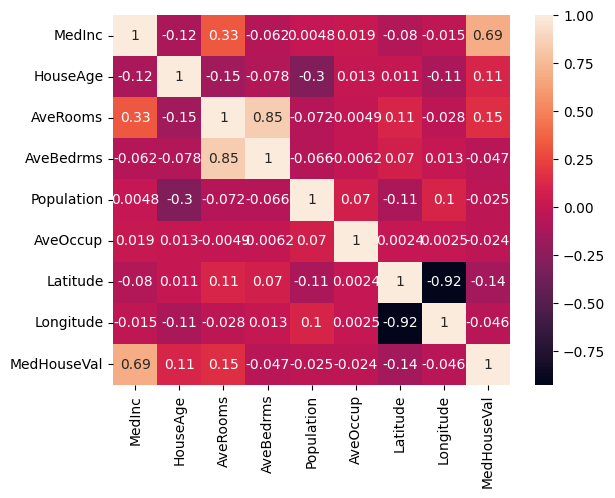

In [3]:
sns.heatmap(df.corr(),annot=True)

In [5]:
## dividing data into independent and dependent feature
x = df1[['MedInc','AveBedrms','Latitude','Longitude']] #independent features
y = df2 #dependent features

In [6]:
x

,MedInc,AveBedrms,Latitude,Longitude
0,8.3252,1.023810,37.88,-122.23
1,8.3014,0.971880,37.86,-122.22
2,7.2574,1.073446,37.85,-122.24
3,5.6431,1.073059,37.85,-122.25
4,3.8462,1.081081,37.85,-122.25
...,...,...,...,...
20635,1.5603,1.133333,39.48,-121.09
20636,2.5568,1.315789,39.49,-121.21
20637,1.7000,1.120092,39.43,-121.22
20638,1.8672,1.171920,39.43,-121.32


In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=10)
print(f"x_train shape: {x_train.shape}, x_test shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")

x_train shape: (13828, 4), x_test shape: (6812, 4)
y_train shape: (13828, 1), y_test shape: (6812, 1)


In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [9]:
from sklearn.linear_model import LinearRegression


#creating object
regression = LinearRegression()

#fitting with training data
regression.fit(x_train,y_train)

LinearRegression()

In [10]:
#slope or coefficient
print("Slopes: ",regression.coef_)
##different slopes for each feature

Slopes:  [[ 0.69048398  0.09680723 -1.11230557 -1.06708229]]


In [11]:
#Intercept
regression.intercept_

array([2.06347681])

In [1]:
#prediction for the test data
y_pred = regression.predict(x_test)

NameError: name 'regression' is not defined